In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.ensemble import RandomForestRegressor

In [2]:
def funcArmonica(x, a, b):
    return a * np.sin(b*2*np.pi*x)

In [3]:
n_periodo = 1000
t_final = 2
amp = 3.0
freq = 5.0 # Hz
N = int(n_periodo*t_final*freq)
t_data = np.linspace(0, t_final, N)
y_sr = funcArmonica(t_data, amp, freq)
y_data = y_sr + 1.0*np.random.normal(size = N)

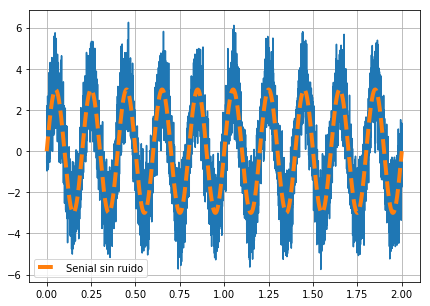

In [4]:
plt.figure(figsize=(7,5))
plt.plot(t_data,y_data)
plt.plot(t_data,y_sr, '--', lw = 4, label = 'Senial sin ruido')
plt.grid()
plt.legend()
plt.show()

In [5]:
params, params_covariance = optimize.curve_fit(funcArmonica, t_data[0:2*n_periodo], y_data[0:2*n_periodo], bounds=(1, [5, 10]))
print(params)
print(params_covariance)

[2.97865967 4.99838306]
[[9.97654901e-04 1.57961111e-05]
 [1.57961111e-05 5.30171475e-05]]


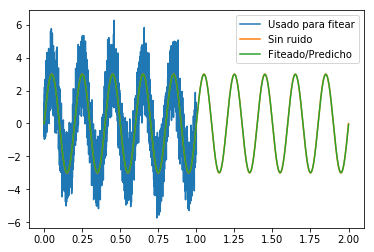

In [6]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr,label='Sin ruido')
plt.plot(t_data, funcArmonica(t_data, params[0], params[1]),label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

In [7]:
error = np.sqrt(np.sum((funcArmonica(t_data, params[0], params[1]) - y_sr)**2))
print(error)

2.8850276533552086


### Ajuste por RF

In [8]:
k = n_periodo
x_nueva_forma = np.zeros((N - k,k))
y_nueva_forma = np.zeros(N - k)

In [9]:
for i in range(x_nueva_forma.shape[0]):
    x_nueva_forma[i,:] = y_data[i:i+k]
    y_nueva_forma[i] = y_data[i+k]

In [10]:
x_nueva_forma.shape, y_nueva_forma.shape

((9000, 1000), (9000,))

In [12]:
N_train = 5000
x_train = x_nueva_forma[:N_train,:]
y_train = y_nueva_forma[:N_train]

In [13]:
x_train.shape

(5000, 1000)

In [14]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train)

In [15]:
y_pred = rf.predict(x_nueva_forma)

In [16]:
y_pred.shape

(9000,)

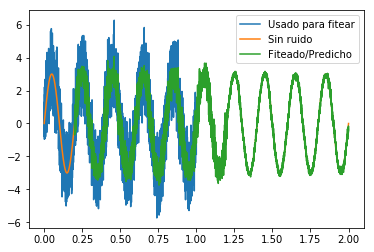

In [17]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[k:], y_pred,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Estimar segunda mitad sin mirar

In [18]:
cantidad_estimaciones = N - N_train
predicciones = []
for i in range(cantidad_estimaciones):
    if i == 0:
        x_prediccion = y_data[N//2 - k + 1 + i : N//2 + 1 + i]
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion.reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)
    else:
        x_prediccion = np.append(x_prediccion, predicciones[-1])
        #print(x_prediccion)
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion[i:].reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)

    

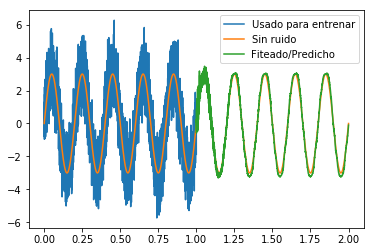

In [19]:
plt.plot(t_data[0:N_train],y_data[0:N_train], label = 'Usado para entrenar')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[N_train:], predicciones,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Cambiando el modelo y los datos

In [20]:
def funcAmortiguada(x, a, b, c):
    return a * np.sin(b*2*np.pi*x) *np.exp(-c*x)

In [81]:
n_periodo = 1000
t_final = 2
amp = 3.0
freq = 5.0 # Hz
N = int(n_periodo*t_final*freq)
t_data = np.linspace(0, t_final, N)

gamma = 0.5
y_sr = funcAmortiguada(t_data, amp, freq, gamma)
y_data = y_sr + 1.0*np.random.normal(size = N)

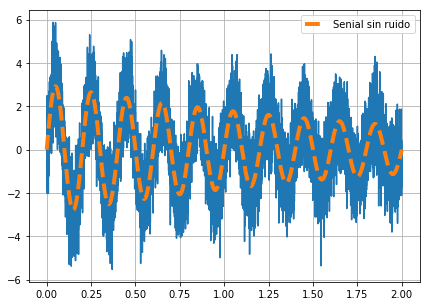

In [82]:
plt.figure(figsize=(7,5))
plt.plot(t_data,y_data)
plt.plot(t_data,y_sr, '--', lw = 4, label = 'Senial sin ruido')
plt.grid()
plt.legend()
plt.show()

In [83]:
params, params_covariance = optimize.curve_fit(funcArmonica, t_data[0:2*n_periodo], y_data[0:2*n_periodo], bounds=(1, [5, 10]))
print(params)
print(params_covariance)

[2.77513231 5.01090897]
[[1.01493189e-03 1.70157042e-05]
 [1.70157042e-05 6.15285886e-05]]


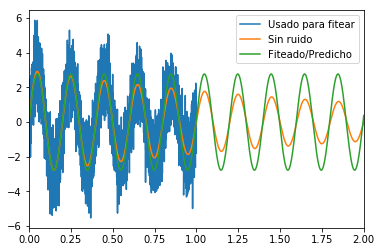

In [84]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr,label='Sin ruido')
plt.plot(t_data, funcArmonica(t_data, params[0], params[1]),label='Fiteado/Predicho')

plt.xlim([0, 2])
plt.legend(loc='best')
plt.show()

In [85]:
error = np.sqrt(np.sum((funcArmonica(t_data, params[0], params[1]) - y_sr)**2))
print(error)

73.54704587859243


### Modelo RF

In [86]:
k = n_periodo
x_nueva_forma = np.zeros((N - k,k))
y_nueva_forma = np.zeros(N - k)

In [87]:
for i in range(x_nueva_forma.shape[0]):
    x_nueva_forma[i,:] = y_data[i:i+k]
    y_nueva_forma[i] = y_data[i+k]

In [88]:
x_nueva_forma.shape, y_nueva_forma.shape

((9000, 1000), (9000,))

In [89]:
N_train = 5000
x_train = x_nueva_forma[:N_train,:]
y_train = y_nueva_forma[:N_train]

In [90]:
x_train.shape

(5000, 1000)

In [91]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10).fit(x_train,y_train)

In [75]:
y_pred = rf.predict(x_nueva_forma)

In [76]:
y_pred.shape

(9000,)

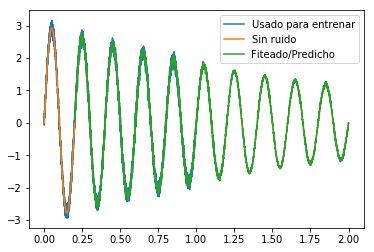

In [80]:
plt.plot(t_data[0:N_train],y_data[0:N_train], label = 'Usado para entrenar')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[k:], y_pred,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()

### Estimar segunda mitad sin mirar

In [78]:
cantidad_estimaciones = N - N_train
predicciones = []
for i in range(cantidad_estimaciones):
    if i == 0:
        x_prediccion = y_data[N//2 - k + 1 + i : N//2 + 1 + i]
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion.reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)
    else:
        x_prediccion = np.append(x_prediccion, predicciones[-1])
        #print(x_prediccion)
        #print(x_prediccion.shape)
        y_pred_fecha = rf.predict(x_prediccion[i:].reshape(1,-1))
        #print(y_pred_fecha)
        predicciones.append(y_pred_fecha)

    

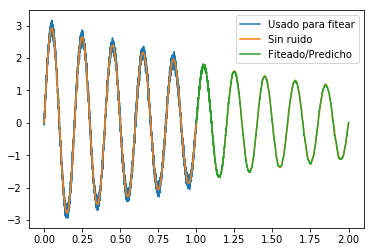

In [79]:
plt.plot(t_data[0:N//2],y_data[0:N//2], label = 'Usado para fitear')
plt.plot(t_data, y_sr, label='Sin ruido')
plt.plot(t_data[N - cantidad_estimaciones:], predicciones,label='Fiteado/Predicho')

plt.legend(loc='best')
plt.show()